# Analisa Toko Daring Besar Menjalankan Testing A/B


Anda adalah seorang analis di sebuah toko daring besar. Anda bersama tim pemasaran telah menyusun daftar hipotesis untuk membantu meningkatkan pendapatan.
Anda perlu memprioritaskan hipotesis tersebut, menjalankan A/B testing, dan menganalisis hasilnya.

## Konten 

* [2. Pendahuluan]
    * [2.1 Memuat Data]
    * [2.2 Mempersiapkan Data]
* [3  Mengunduh data dan menyiapkannya untuk analisis]
    * [3.1. Data Cleaning DataFrame data_company]
    * [3.2. Data Cleaning DataFrame data_dropoff]
* [4. Menguji Hipotesis (Python)]
    * [4.1  Data Cleaning DataFrame data_loop]
    * [4.2  Visualisasi Grafik]
    * [4.3  Uji Hipotesis]
* [5. Kesimpulan]


## Pendahuluan 

Pendahuluan:

Proyek ini bertujuan untuk menganalisis data pesanan dari suatu toko daring. Data yang digunakan mencakup informasi tentang transaksi pembelian, pengunjung, kelompok, tanggal, dan pendapatan. Melalui analisis data ini, kita akan mencoba mendapatkan wawasan yang berguna tentang perilaku pengguna, performa kelompok, serta perbedaan dalam konversi dan pendapatan antara kelompok A dan B.


### Tujuan: 
Berikut tujuan:

1. Menganalisis perilaku pengguna: Tujuan utama proyek ini adalah untuk memahami perilaku pengguna dalam melakukan pembelian di toko daring. Dengan menganalisis data pesanan, kita dapat mengidentifikasi pola dan tren dalam jumlah pesanan, frekuensi pembelian, dan pendapatan pengguna. 

2. Membandingkan performa kelompok A dan B: Proyek ini bertujuan untuk membandingkan performa dua kelompok, yaitu kelompok A dan B, dalam hal konversi dan pendapatan. Dengan menggunakan pengujian statistik, kita dapat menentukan apakah ada perbedaan yang signifikan antara kedua kelompok.  

3. Mengidentifikasi faktor-faktor pengaruh: Tujuan lain proyek ini adalah untuk mengidentifikasi faktor-faktor yang mempengaruhi konversi dan pendapatan. Dengan menganalisis data pesanan secara holistik, kita dapat mencari hubungan antara variabel-variabel seperti kelompok, tanggal, dan pengunjung dengan konversi dan pendapatan. 

4. Memberikan wawasan berharga untuk pengambilan keputusan bisnis: Tujuan akhir dari proyek ini adalah untuk memberikan wawasan yang berharga bagi pemangku kepentingan dalam pengambilan keputusan bisnis.



### Tahapan
ada 3
dataframe yang disediakan : "/datasets/hypotheses_us.csv"
                            "/datasets/orders_us.csv"
                            "/datasets/visits_us.csv"

Tidak ada informasi terkait kualitas data tersebut, jadi kita perlu memeriksanya terlebih dahulu sebelum menguji hipotesis.
Berikut adalah tahapannya:

1. Pengumpulan Data.

2. Eksplorasi Data.

3. Analisis Perilaku Pengguna. 

4. Perbandingan Performa Kelompok A dan B.  

5. Identifikasi Faktor Pengaruh.

6. Kesimpulan dan Rekomendasi.


[Kembali ke Konten](#back)

## Mengunduh data dan menyiapkannya untuk analisis 

Pastikan untuk melakukan pra-pemrosesan data terlebih dahulu. Tidak menutup kemungkinan, dataset asli yang Anda miliki mengandung kesalahan; misalnya, sebagian pengunjung mungkin berada di kelompok A maupun di kelompok B.

### Memuat Data

In [1]:
# Muat semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Analisis Data Eksploratif (Python)

In [2]:
# load the dataset

# Memuat dataset kunjungan konsumen
#data_hypo = pd.read_csv('/datasets/hypotheses_us.csv')
data_hypo = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')


# Memuat dataset pesanan konsumen
data_order = pd.read_csv('/datasets/orders_us.csv')

# Memuat dataset biaya
data_visits = pd.read_csv('/datasets/visits_us.csv')


### Analisis Data Eksploratif (Python)

#### Data Cleaning Dataset data_hypo

In [3]:
# Menampilkan informasi di dataset data_hypo
data_hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
#Menampilakn 10 row teratas
data_hypo.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [5]:
# Mengubah nama kolom menjadi huruf kecil
data_hypo.columns = data_hypo.columns.str.lower()

# Menampilkan DataFrame setelah perubahan nama kolom
data_hypo


,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [6]:
#Mengubah tipe data menjadi tipe data float
data_hypo['reach'] = data_hypo['reach'].astype(float)
data_hypo['impact'] = data_hypo['impact'].astype(float)
data_hypo['confidence'] = data_hypo['confidence'].astype(float)
data_hypo['effort'] = data_hypo['effort'].astype(float)

In [7]:
#Mengecek data ganda
duplicate_rows_hypo = data_hypo[data_hypo.duplicated()]
duplicate_rows_hypo

,hypothesis,reach,impact,confidence,effort


In [8]:
#Mengecek data hilang
data_hypo.isnull().sum()


hypothesis    0
reach         0
impact        0
confidence    0
effort        0
dtype: int64

In [9]:
data_hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hypothesis  9 non-null      object 
 1   reach       9 non-null      float64
 2   impact      9 non-null      float64
 3   confidence  9 non-null      float64
 4   effort      9 non-null      float64
dtypes: float64(4), object(1)
memory usage: 488.0+ bytes


In [10]:
data_hypo.describe()

,reach,impact,confidence,effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


#### Data Cleaning Dataset data_orders

In [11]:
# Menampilkan informasi di dataset data_order
data_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [12]:
#Merubah nama
data_order = data_order.rename(columns={'transactionId':'transaction_id'})
data_order = data_order.rename(columns={'visitorId':'visitor_id'})


In [13]:
#merubah tipe data date semula object menjadi tipe data datetome
data_order['date'] = pd.to_datetime(data_order['date'])

In [14]:
#cek data ganda
duplicate_rows_order = data_order[data_order.duplicated()]
duplicate_rows_order

,transaction_id,visitor_id,date,revenue,group


In [15]:
#cek nilai yang hilang
data_order.isnull().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [16]:
data_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [17]:
data_order.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


#### Data Cleaning Dataset data_visits

In [18]:
# Menampilkan informasi di dataset data_costs
data_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [19]:
#merubah tipe data date semula object menjadi tipe data datetome
data_visits['date'] = pd.to_datetime(data_visits['date'])

In [20]:
#cek data ganda
data_visits.duplicated().sum()

0

In [21]:
#cek nilai hilang
data_visits.isnull().sum()

date      0
group     0
visits    0
dtype: int64

In [22]:
data_visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


## Bagian 1. Memprioritaskan Hipotesis

### Menerapkan framework ICE

Menerapkan framework ICE untuk memprioritaskan hipotesis. Urutkan hipotesis tersebut dalam urutan prioritas menurun.

In [23]:
#Menampilkan nilai di data_hypo
data_hypo

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3.0,10.0,8.0,6.0
1,Launch your own delivery service. This will sh...,2.0,5.0,4.0,10.0
2,Add product recommendation blocks to the store...,8.0,3.0,7.0,3.0
3,Change the category structure. This will incre...,8.0,3.0,3.0,8.0
4,Change the background color on the main page. ...,3.0,1.0,1.0,1.0
5,Add a customer review page. This will increase...,3.0,2.0,2.0,3.0
6,Show banners with current offers and sales on ...,5.0,3.0,8.0,3.0
7,Add a subscription form to all the main pages....,10.0,7.0,8.0,5.0
8,Launch a promotion that gives users discounts ...,1.0,9.0,9.0,5.0


In [24]:
#Menghitung skor ICE
data_hypo['ICE'] = (data_hypo['impact'] * data_hypo['confidence']) / data_hypo['effort']

# Menampilkan kolom hypothesis dan ICE, diurutkan secara menurun berdasarkan skor ICE
sorted_data_ice = data_hypo[['hypothesis','ICE']].sort_values(by='ICE',ascending=False)

# Menampilkan DataFrame hasil pengurutan
sorted_data_ice

,hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


### Menerapkan framework RICE

Menerapkan framework RICE untuk memprioritaskan hipotesis. 
Urutkan hipotesis tersebut dalam urutan prioritas menurun.

In [25]:
#Menampilkan nilai di data_hypo
data_hypo

,hypothesis,reach,impact,confidence,effort,ICE
0,Add two new channels for attracting traffic. T...,3.0,10.0,8.0,6.0,13.333333
1,Launch your own delivery service. This will sh...,2.0,5.0,4.0,10.0,2.000000
2,Add product recommendation blocks to the store...,8.0,3.0,7.0,3.0,7.000000
3,Change the category structure. This will incre...,8.0,3.0,3.0,8.0,1.125000
4,Change the background color on the main page. ...,3.0,1.0,1.0,1.0,1.000000
5,Add a customer review page. This will increase...,3.0,2.0,2.0,3.0,1.333333
6,Show banners with current offers and sales on ...,5.0,3.0,8.0,3.0,8.000000
7,Add a subscription form to all the main pages....,10.0,7.0,8.0,5.0,11.200000
8,Launch a promotion that gives users discounts ...,1.0,9.0,9.0,5.0,16.200000


In [26]:
# Menghitung nilai RICE
data_hypo['RICE'] = (data_hypo['reach'] * data_hypo['impact'] * data_hypo['confidence']) / data_hypo['effort']

# Menampilkan kolom 'hypothesis dan 'RICE', diurutkan menurun berdasarkan nilai 'RICE'
sorted_data_rice = data_hypo[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

#Menampilkan hasil setelah diurutkan
sorted_data_rice

,hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


In [27]:
#Menampilkan data_hypo latest
data_hypo

,hypothesis,reach,impact,confidence,effort,ICE,RICE
0,Add two new channels for attracting traffic. T...,3.0,10.0,8.0,6.0,13.333333,40.0
1,Launch your own delivery service. This will sh...,2.0,5.0,4.0,10.0,2.000000,4.0
2,Add product recommendation blocks to the store...,8.0,3.0,7.0,3.0,7.000000,56.0
3,Change the category structure. This will incre...,8.0,3.0,3.0,8.0,1.125000,9.0
4,Change the background color on the main page. ...,3.0,1.0,1.0,1.0,1.000000,3.0
5,Add a customer review page. This will increase...,3.0,2.0,2.0,3.0,1.333333,4.0
6,Show banners with current offers and sales on ...,5.0,3.0,8.0,3.0,8.000000,40.0
7,Add a subscription form to all the main pages....,10.0,7.0,8.0,5.0,11.200000,112.0
8,Launch a promotion that gives users discounts ...,1.0,9.0,9.0,5.0,16.200000,16.2


### Perubahan Prioritas Hipotesis

Menunjukkan perubahan prioritas hipotesis saat RICE diterapkan untuk menggantikan ICE. 
Berikan penjelasan terkait perubahan tersebut.

Dalam data_hypo, terdapat perubahan prioritas hipotesis saat RICE diterapkan untuk menggantikan ICE.
Berikut analisanya sebelumnya saat menggunakan skor ICE, nilai tertinggi dianggap sebagai prioritas utama. 
Namun setelah skor RICE diterapkan, perubahan prioritas terjasi, karena ikut mempertimbangkan faktor "reach" dalam perhitungan skor.


Berikut perubahan prioritas hipotesis dalam data_hypo :

    Record 1. 'Add two new channels for attracting traffic. This will bring 30% more users'
        Nilai ICE: 13.333333
        Nilai RICE: 40.0
        
    Record 2. 'Launch your own delivery service. This will shorten delivery time'
        Nilai ICE: 2.000000
        Nilai RICE: 4.0
        
    Record 3. 'Add product recommendation blocks to the store's site. This will increase conversion and average purchase size'
        Nilai ICE: 7.000000
        Nilai RICE: 56.0


   Dari ke 3 contoh record diatas dapat disimpulkan perubahan prioritas dalam data_hypo terjadi karena RICE mempertimbangkan faktor jangkauan pengguna dalam menentukan prioritas. dan jangkauan yang luas akan mendapatkan skor RICE yang lebih tinggi, dan dengan demikian, naik dalam prioritas. Ini membantu fokus pada hipotesis yang memiliki potensi dampak yang lebih besar

## Bagian 2. Analisis A/B Testing

Menganalisis A/B testing:

### Membuat Metrik Kumulatif 

In [28]:
datesgroups = data_order[['date', 'group']].drop_duplicates()
datesgroups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [29]:
#Membuat variabel ordersAggregated dengan informasi yang diminta:
ordersAggregated = datesgroups.apply(lambda x: data_order[np.logical_and(data_order['date'] <= x['date'], data_order['group'] == x['group'])].agg({
    'date' : 'max',
    'group' : 'max',
    'transaction_id' : pd.Series.nunique,
    'visitor_id' : pd.Series.nunique,
    'revenue' : 'sum'
}), axis=1).sort_values(by=['date','group'])


In [30]:
# Membuat variabel visitorsAggregated dengan jumlah pengunjung yang berbeda dalam kelompok uji hingga tanggal
visitorsAggregated = datesgroups.apply(lambda x: data_visits
                                       [np.logical_and (data_visits['date'] <= x['date'], 
                                        data_visits['group'] == x['group'])].agg({
    'date' : 'max',
    'group' : 'max',
    'visits' : 'sum'
}), axis=1).sort_values(by=['date','group'])


In [31]:
#Mengurutkan ordersAggregated dan visitorsAggregated berdasarkan kolom 'date' dan 'group'
ordersAggregated = ordersAggregated.sort_values(by=['date', 'group'])
visitorsAggregated = visitorsAggregated.sort_values(by=['date', 'group'])


In [32]:
# Untuk menggabungkan DataFrame ordersAggregated dan visitorsAggregated berdasarkan kolom 'date' dan 'group'
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])


In [33]:
#memberikan nama kolom-kolom di DataFrame cumulativeData:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


In [34]:
#menampilkan lima baris pertama
cumulativeData.head(5)


,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


In [35]:
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708
58,2019-08-30,A,545,493,63563.5,18037
59,2019-08-30,B,620,567,90736.3,18198
60,2019-08-31,A,557,503,64554.9,18736


### Gambaran Pendapatan Kumulatif Kelompok

1) Gambarkan pendapatan kumulatif berdasarkan kelompok. 

Buatlah kesimpulan dan asumsinya.

In [36]:
# Filter data cumulativeData untuk kelompok A
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue','orders', 'group']]

# Filter data cumulativeData untuk kelompok B
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders','group']]


In [37]:
cumulativeRevenueA.head()

,date,revenue,orders,group
0,2019-08-01,2356.8,24,A
2,2019-08-02,3860.3,44,A
4,2019-08-03,5675.5,68,A
6,2019-08-04,6822.1,84,A
8,2019-08-05,8810.2,109,A


In [38]:
cumulativeRevenueB.head()

,date,revenue,orders,group
1,2019-08-01,1620.0,21,B
3,2019-08-02,4243.8,45,B
5,2019-08-03,6050.6,61,B
7,2019-08-04,7767.9,78,B
9,2019-08-05,9262.9,101,B


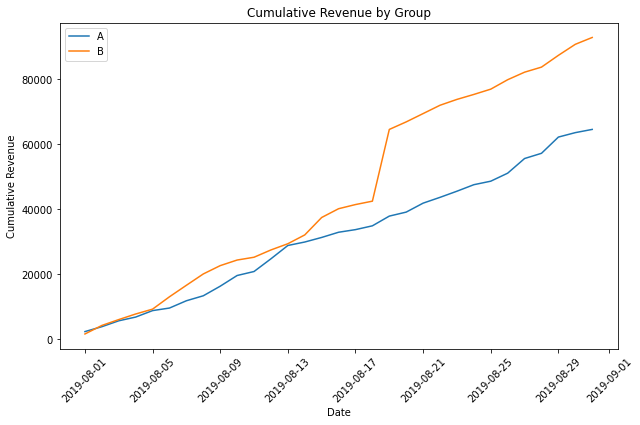

In [39]:
# Membuat grafik dengan ukuran (10, 6)
plt.figure(figsize=(10, 6))

# Membuat grafik pendapatan kumulatif harian untuk kelompok A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Membuat grafik pendapatan kumulatif harian untuk kelompok B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

# Menampilkan legenda pada grafik
plt.legend()

# Memberi label pada sumbu x
plt.xlabel('Date')
plt.xticks(rotation=45)

# Memberi label pada sumbu y
plt.ylabel('Cumulative Revenue')
plt.title('Cumulative Revenue by Group')

# Menampilkan grafik
plt.show()

Berdasarkan grafik pendapatan kumulatif harian untuk kelompok A dan B, dapat diambil beberapa kesimpulan dan asumsi:

1. Pendapatan kumulatif harian cenderung meningkat seiring berjalannya waktu untuk kedua kelompok A dan B. Ini menunjukkan adanya peningkatan pendapatan dari pesanan seiring berjalannya waktu.

2. Kelompok A dan B memiliki tren pendapatan kumulatif yang relatif serupa sepanjang periode yang diamati. Meskipun ada fluktuasi harian, baik kelompok A maupun B mengalami peningkatan pendapatan secara keseluruhan.

3. Pada beberapa titik tertentu, terlihat bahwa kelompok B memiliki pendapatan kumulatif yang sedikit lebih tinggi daripada kelompok A. Namun, perbedaan ini tidak konsisten dan dapat dipengaruhi oleh variasi harian dalam jumlah pesanan.

4. Asumsi yang mungkin adalah bahwa pengujian A/B yang dilakukan mungkin tidak memberikan perbedaan signifikan dalam pendapatan antara kelompok A dan B. Meskipun ada variasi harian, tren umum pendapatan kumulatif serupa di antara kedua kelompok.



### Gambaran Pesanan Rata-rata Kumulatif

2) Gambarkan ukuran pesanan rata-rata kumulatif berdasarkan kelompok. 

Buatlah kesimpulan dan asumsinya.

In [40]:
#Menghitung nilai kumulatif rata-rata nilai pesanan di group A
cumulativeRevenueA['avg_orderA'] = cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders']
cumulativeRevenueA.head()

,date,revenue,orders,group,avg_orderA
0,2019-08-01,2356.8,24,A,98.200000
2,2019-08-02,3860.3,44,A,87.734091
4,2019-08-03,5675.5,68,A,83.463235
6,2019-08-04,6822.1,84,A,81.215476
8,2019-08-05,8810.2,109,A,80.827523


In [41]:
#Menghitung nilai kumulatif rata-rata nilai pesanan di group B
cumulativeRevenueB['avg_orderB']  = cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders']
cumulativeRevenueB.head()

,date,revenue,orders,group,avg_orderB
1,2019-08-01,1620.0,21,B,77.142857
3,2019-08-02,4243.8,45,B,94.306667
5,2019-08-03,6050.6,61,B,99.190164
7,2019-08-04,7767.9,78,B,99.588462
9,2019-08-05,9262.9,101,B,91.711881


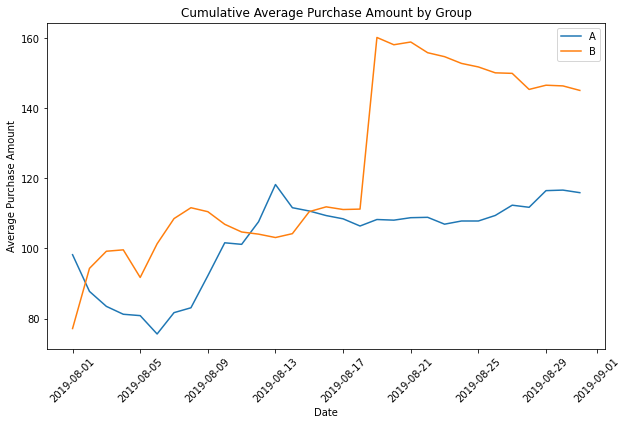

In [42]:
plt.figure(figsize=(10, 6))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')

plt.xlabel('Date')
plt.ylabel('Average Purchase Amount')
plt.title('Cumulative Average Purchase Amount by Group')
plt.xticks(rotation=45)
plt.legend()

plt.show()


Metrik kumulatif kelompok BIRU secara konsisten lebih rendah daripada metrik kumulatif kelompok KUNING. Pada awal pengujian, dapat terlihat bahwa fluktuasi konversi terjadi pada kedua kelompok. Grafik tersebut menjadi stabil hanya menjelang akhir pengujian.

kelompok KUNING signifikan nilainya terus meningkat dari waktu- ke waktu di bandingkan kelompok BIRU

### Gambarkan Perbedaan Relatif

3) Gambarkan perbedaan relatif untuk ukuran pesanan rata-rata kumulatif kelompok B yang dibandingkan dengan kelompok A. 

Buatlah kesimpulan dan asumsinya.

In [43]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue

,date,revenueA,ordersA,groupA,avg_orderA,revenueB,ordersB,groupB,avg_orderB
0,2019-08-01,2356.8,24,A,98.200000,1620.0,21,B,77.142857
1,2019-08-02,3860.3,44,A,87.734091,4243.8,45,B,94.306667
2,2019-08-03,5675.5,68,A,83.463235,6050.6,61,B,99.190164
3,2019-08-04,6822.1,84,A,81.215476,7767.9,78,B,99.588462
4,2019-08-05,8810.2,109,A,80.827523,9262.9,101,B,91.711881
5,2019-08-06,9600.0,127,A,75.590551,13069.3,129,B,101.312403
6,2019-08-07,11842.9,145,A,81.675172,16600.8,153,B,108.501961
7,2019-08-08,13373.3,161,A,83.063975,20088.6,180,B,111.603333
8,2019-08-09,16320.4,177,A,92.205650,22646.7,205,B,110.471707
9,2019-08-10,19608.6,193,A,101.598964,24367.1,228,B,106.873246


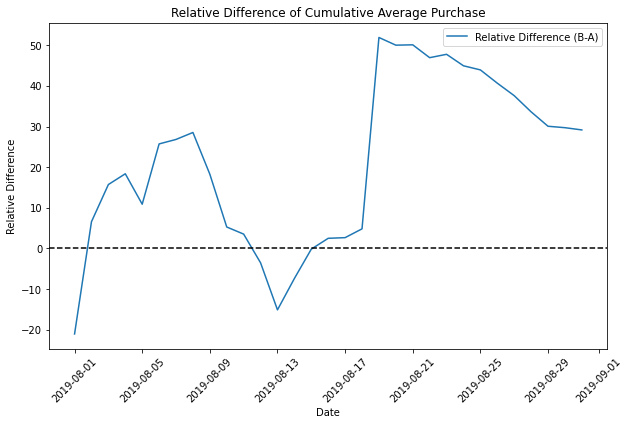

In [44]:
# Menghitung perbedaan relatif antara jumlah pembelian rata-rata kelompok B dan kelompok A
relative_difference = mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB'] - mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']

plt.figure(figsize=(10, 6))
# Menggambar grafik perbedaan relatif
plt.plot(mergedCumulativeRevenue['date'], relative_difference, label='Relative Difference (B-A)')
plt.axhline(y=0, color='black', linestyle='--')

# Menambahkan label dan judul
plt.xlabel('Date')
plt.ylabel('Relative Difference')
plt.title('Relative Difference of Cumulative Average Purchase')
plt.xticks(rotation=45)

# Menampilkan legenda
plt.legend()

# Menampilkan grafik
plt.show()


### Menghitung Tingkat Konversi Setiap Kelompok 

4) Hitung tingkat konversi setiap kelompok sebagai rasio pesanan terhadap jumlah kunjungan setiap hari. 

Buat grafik tingkat konversi harian dari kedua kelompok dan jelaskan perbedaannya. 

Buatlah kesimpulan dan asumsinya.

In [45]:
# Menambahkan kolom 'conversion' ke cumulativeData
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

In [46]:
# Filter data cumulativeData untuk kelompok A
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']

# Filter data cumulativeData untuk kelompok B
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

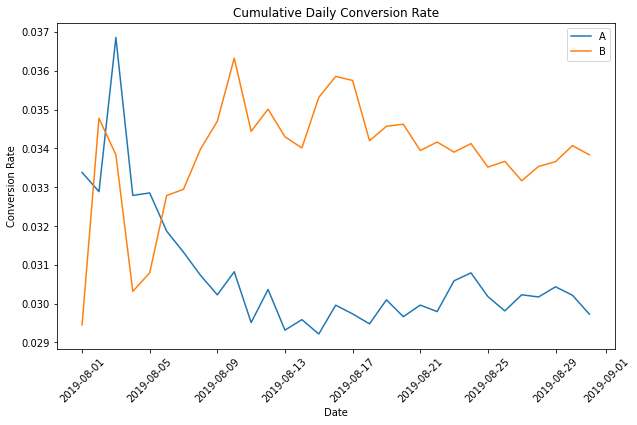

In [47]:

# Mengatur skala sumbu
#plt.axis([pd.to_datetime('2019-03-10'), pd.to_datetime('2019-04-23'), 0, 0.05])
plt.figure(figsize=(10, 6))
# Menggambar grafik konversi kumulatif harian untuk kelompok A
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')

# Menggambar grafik konversi kumulatif harian untuk kelompok B
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

# Menambahkan label dan judul
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.title('Cumulative Daily Conversion Rate')
plt.xticks(rotation=45)

# Menampilkan legenda
plt.legend()

# Menampilkan grafik
plt.show()


Berdasarkan grafik konversi kumulatif harian untuk kelompok A dan B, terdapat beberapa kesimpulan dan asumsi yang dapat diambil:

Metrik kumulatif kelompok BIRU secara konsisten lebih rendah daripada metrik kumulatif kelompok KUNING. Pada awal pengujian, dapat terlihat bahwa fluktuasi konversi terjadi pada kedua kelompok. Grafik tersebut menjadi stabil hanya menjelang akhir pengujian.


In [48]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


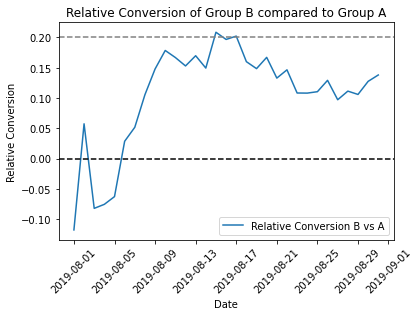

In [49]:
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA'] - 1, label='Relative Conversion B vs A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.legend()

#plt.axis([pd.to_datetime('2019-03-10'), pd.to_datetime('2019-04-23'), -0.5, 0.5])
plt.xlabel('Date')
plt.ylabel('Relative Conversion')
plt.title('Relative Conversion of Group B compared to Group A')
plt.xticks(rotation=45)

plt.show()


Berdasarkan grafik perbedaan relatif antara tingkat konversi kumulatif kelompok B dibandingkan dengan kelompok A, dapat kita tarik beberapa kesimpulan dan asumsi:

1. Kelompok B secara konsisten menunjukkan tingkat konversi yang lebih baik daripada kelompok A. Seiring dengan berjalannya waktu, perbedaan ini terus meningkat. Jika terdapat cukup data untuk mencapai tingkat signifikansi, sebaiknya kita lanjutkan pengujian, karena kelompok B sudah dipastikan lebih baik daripada A.

### Membuat Scatter Chart Jumlah Pesanan

5) Buatlah diagram tebar (scatter chart) untuk jumlah pesanan per pengguna. 

Buatlah kesimpulan dan asumsinya.

In [50]:
data_order.head(5)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [51]:
# Menghitung jumlah pesanan per pengguna
ordersByUsers = (data_order.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique}))

# Mengubah nama kolom
ordersByUsers.columns = ['visitor_id', 'orders']

# Mengurutkan data berdasarkan jumlah pesanan dalam urutan turun
#ordersByUsers = ordersByUsers.sort_values(by='orders', ascending=False)

# Menampilkan 10 baris pertama
ordersByUsers.sort_values(by='orders', ascending=False).head(10)


,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


(array([937.,  64.,  17.,   3.,   6.,   0.,   0.,   1.,   1.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

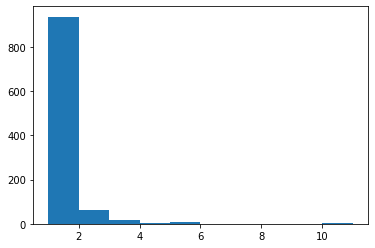

In [52]:
plt.hist(ordersByUsers['orders'])

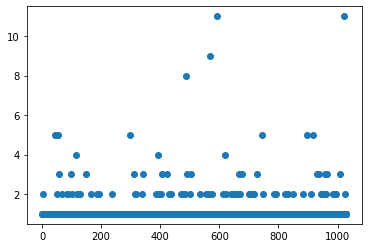

In [53]:
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])

Beberapa pengguna melakukan sedikit pesanan, sementara yang lain melakukan pesanan dalam jumlah yang lebih besar.
Terdapat beberapa titik data yang terlihat sebagai outlier, yaitu pengguna-pengguna yang melakukan pesanan dalam jumlah yang sangat tinggi
Jumlah pesanan cenderung bervariasi secara acak dan tidak menunjukkan tren naik atau turun yang konsisten.

### Menghitung Persentil Ke-95 Dan Ke-99 Pesanan Per Pengguna

6) Hitung persentil ke-95 dan ke-99 untuk jumlah pesanan per pengguna. 

Tentukan titik ketika suatu titik data berubah menjadi anomali.

In [54]:
# Menghitung persentil sampel ke-95 dan ke-99
percentiles = np.percentile(ordersByUsers['orders'], [95, 99])

# Menampilkan hasilnya
print("Persentil ke-95: ", percentiles[0])
print("Persentil ke-99: ", percentiles[1])


Persentil ke-95:  2.0
Persentil ke-99:  4.0


### Membuat Scatter Chart Harga Pesanan

7) Buatlah diagram tebar (scatter chart) untuk harga pesanan. Buatlah kesimpulan dan asumsinya.

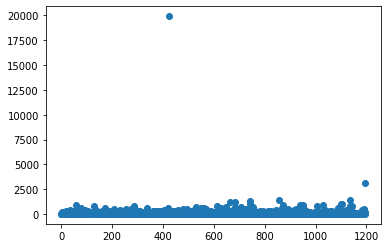

In [55]:
x_values = pd.Series(range(0,len(data_order['revenue'])))

plt.scatter(x_values, data_order['revenue'])

Terdapat variasi yang signifikan dalam pendapatan pesanan. Beberapa titik data memiliki pendapatan yang tinggi, sementara yang lain memiliki pendapatan yang rendah. 

Terdapat beberapa titik data yang terlihat sebagai outlier, yaitu titik-titik data yang berjarak jauh dari pola umum data. 

### Menghitung Persentil Ke-95 Dan Ke-99 Harga Pesanan

8) Hitung persentil ke-95 dan ke-99 untuk harga pesanan. 

Tentukan titik ketika suatu titik data berubah menjadi anomali.

In [56]:
percentile_95 = np.percentile(data_order['revenue'], 95)
percentile_99 = np.percentile(data_order['revenue'], 99)

print("Persentil ke-95: ", percentile_95)
print("Persentil ke-99: ", percentile_99)


Persentil ke-95:  435.54
Persentil ke-99:  900.9039999999999


### Statistik Perbedaan Konversi 

09) Temukan signifikansi statistik perbedaan konversi antar kelompok menggunakan data mentah. 

Buatlah kesimpulan dan asumsinya.

In [57]:
import scipy.stats as stats

# Variabel ordersByUsersA dan ordersByUsersB
ordersByUsersA = (data_order[data_order['group'] == 'A'].groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique}))
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (data_order[data_order['group'] == 'B'].groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique}))
ordersByUsersB.columns = ['visitor_id', 'orders']

# Variabel sampleA dan sampleB
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data_visits[data_visits['group'] == 'A']
                                    ['visits'].sum()- len(ordersByUsersA['orders'])),
                                    name='orders',),],axis=0,)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data_visits[data_visits['group'] == 'B']
                                    ['visits'].sum() - len(ordersByUsersB['orders'])),
                                    name='orders',),], axis=0,)

# Menampilkan nilai p
print('Nilai p: {0:.5f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

# Menampilkan perbedaan relatif konversi
print('Perbedaan relatif konversi: {0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))


Nilai p: 0.01679
Perbedaan relatif konversi: 0.138


Kesimpulan: 

berdasarkan data mentah yang kita gunakan, ternyata terdapat perbedaan antara kelompok A dan B.
Baris pertama dari output yang dihasilkan memberi kita nilai p sebesar 0,01679, yang mana lebih kecil dari 0,05. Oleh karena itu, kita dapat menolak hipotesis nol karena tidak ditemukan perbedaan yang signifikan secara statistik dalam konversi antar kelompok. Akan tetapi, penurunan relatif dari kelompok B adalah 13,8% (baris kedua dari output).

### Statistik Perbedaan Ukuran

10) Temukan signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok menggunakan data mentah.

Buatlah kesimpulan dan asumsinya.

In [58]:
print('Nilai p: {0:.3f}'.format(stats.mannwhitneyu(data_order[data_order['group'] == 'A']['revenue'],
            data_order[data_order['group'] == 'B']['revenue'],)[1]))

print('Perbedaan relatif konversi: {0:.3f}'.format(data_order[data_order['group'] == 'B']['revenue'].mean()
        / data_order[data_order['group'] == 'A']['revenue'].mean()- 1))


Nilai p: 0.692
Perbedaan relatif konversi: 0.252


Kesimpulan: 

Berdasarkan data mentah yang kita gunakan, ternyata tidak ada perbedaan antara kelompok A dan B.
Baris pertama dari output yang dihasilkan memberi kita nilai p sebesar 0,692 yang mana lebih besar dari 0,05. Oleh karena itu, kita tidak dapat menolak hipotesis nol karena tidak ditemukan perbedaan yang signifikan secara statistik dalam konversi antar kelompok. Akan tetapi, penurunan relatif dari kelompok B adalah 25,2% (baris kedua dari output).

### Statistik Perbedaan Konversi Yang Telah Difilter

11) Temukan signifikansi statistik perbedaan konversi antar kelompok menggunakan data yang telah difilter.

Buatlah kesimpulan dan asumsinya.

Mari kita hitung jumlah total pengguna yang tidak wajar dengan metode shape().

In [59]:
# Mari kita hitung jumlah total pengguna yang tidak wajar dengan metode shape().
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['visitor_id'], ordersByUsersB[ordersByUsersB['orders'] > 4]['visitor_id']], axis = 0)
usersWithExpensiveOrders = data_order[data_order['revenue'] > 20000]['visitor_id']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

print(abnormalUsers.head(5))
print(abnormalUsers.shape)

227    2038680547
326    2378935119
278    2458001652
499    4256040402
Name: visitor_id, dtype: int64
(4,)


Secara total, kita memiliki 4 pengguna yang tidak wajar.

Mari kita cari tahu dampak tindakan mereka terhadap hasil pengujian. Kita akan menghitung signifikansi statistik dari perbedaan konversi antar kelompok menggunakan data yang telah difilter. 

In [60]:
# kita akan menyiapkan sampel jumlah pesanan per pengguna untuk setiap kelompok uji:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data_visits[data_visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data_visits[data_visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [61]:

print("Nilai p: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Nilai p: 0.016
0.149


### Statistik Perbedaan Ukuran Yang Telah Difilter

12) Temukan signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok menggunakan data yang telah difilter. 

Buatlah kesimpulan dan asumsinya.

In [62]:
# Mari kita lihat apa yang terjadi pada nilai ukuran pesanan rata-rata:

print('{0:.3f}'.format(stats.mannwhitneyu(
    data_order[np.logical_and(
        data_order['group']=='A',
        np.logical_not(data_order['visitor_id'].isin(abnormalUsers)))]['revenue'],
    data_order[np.logical_and(
        data_order['group']=='B',
        np.logical_not(data_order['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    data_order[np.logical_and(data_order['group']=='B',np.logical_not(data_order['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/
    data_order[np.logical_and(
        data_order['group']=='A',
        np.logical_not(data_order['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.960
0.235


Nilai p meningkat, namun sekarang perbedaan antar segmen adalah 23,5%.
Meskipun kesimpulan umum kita terhadap pengujian ini tidak berubah, contoh ini menunjukkan secara jelas bagaimana anomali dapat memengaruhi hasil A/B testing!


### Keputusan berdasarkan hasil pengujian

13) Buatlah keputusan berdasarkan hasil pengujian. Keputusan yang memungkinkan adalah: 

1. Menghentikan pengujian, serta mempertimbangkan salah satu kelompok sebagai pemimpin. 
2. Menghentikan pengujian, serta menyimpulkan bahwa tidak ada perbedaan antara kedua kelompok. 
3. Melanjutkan pengujian.

Kesimpulan apa yang bisa kita ambil dari pengujian ini?
Berikut adalah fakta-faktanya:
1. Baik data mentah maupun data yang telah difilter, keduanya menunjukkan perbedaan yang signifikan secara statistik dalam hal konversi antar kelompok.
2. Baik data mentah maupun data yang telah difilter, keduanya tidak menunjukkan perbedaan yang signifikan secara statistik dalam hal ukuran pesanan rata-rata antar kelompok.
3. Grafik yang menunjukkan perbedaan konversi antar kelompok menunjukkan bahwa hasil kelompok B lebih baik, dan memperlihatkan peningkatan secara signifikan:

Menghentikan pengujian, serta mempertimbangkan salah satu kelompok sebagai pemimpin..

Berdasarkan fakta-fakta tersebut, dapat disimpulkan bahwa pengujian ini tidak berjalan dengan baik dan harus dihentikan. Tidak ada gunanya untuk melanjutkan pengujian ini, karena probabilitas bahwa segmen B akan menjadi lebih baik daripada segmen A hampir tidak ada.

## Kesimpulan 

saya telah berhasil menyelesaikan beberapa tugas sulit dalam bab ini. 

Berikut adalah hal-hal yang Anda temukan:
Terdapat perbedaan yang signifikan secara statistik dalam hal konversi antar kelompok, baik berdasarkan data mentah maupun data yang difilter.

Data mentah awalnya tidak menunjukkan perbedaan yang signifikan secara statistik antar kelompok dalam hal ukuran pembelian rata-rata. Akan tetapi, setelah anomali dihilangkan, ternyata perbedaannya secara statistik sangatlah signifikan.

Grafik perbedaan konversi antar kelompok menunjukkan bahwa hasil kelompok B lebih baik daripada kelompok A: hasil dari kelompok B cenderung meningkat atau stabil mendekati nilai rata-rata.

Berdasarkan fakta-fakta yang telah kami sebutkan di atas, apa yang harus kita lakukan selanjutnya?
Menghentikan pengujian, menganggapnya sudah berhasil, dan melanjutkan ke hipotesis berikutnya.